In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.colors import ListedColormap
import numpy as np
from pyfonts import load_bunny_font

In [2]:
font = load_bunny_font("Architects Daughter")
txt_style=dict(font=font, size=12, alpha=0.7)

In [3]:
places = ["Mexico City, Mexico",
          "Amsterdam, the Netherlands",  
          "Belo Horizonte, Brazil", 
          "Barcelona, Spain",          
          "Adelaide, Australia",
          "Stockholm, Sweden", 
          "San Francisco, USA", 
          "Casablanca, Morocco",         
          "Avola, Italy"]

In [4]:
lat_mexico = 19.419872
lon_mexico = -99.088043

lat_adam = 52.36879
lon_adam = 4.88559

lat_belo = -19.92639
lon_belo = -43.95164

lat_barca = 41.40614
lon_barca = 2.17441

lat_adelaide = -34.92866
lon_adelaide = 138.59982

lat_stockholm = 59.33769
lon_stockholm = 18.090073

lat_alamo = 37.776931
lon_alamo = -122.433904

lat_casablanca = 33.56105
lon_casablanca = -7.55761

lat_avola = 36.909471
lon_avola = 15.135019

In [5]:
lats = [lat_mexico, lat_adam, lat_belo, lat_barca, lat_adelaide, lat_stockholm, lat_alamo, lat_casablanca, lat_avola]
lons = [lon_mexico, lon_adam, lon_belo, lon_barca, lon_adelaide, lon_stockholm, lon_alamo, lon_casablanca, lon_avola]

In [6]:
def set_linewidth(row):    
    if row["highway"] in ["primary"]:  
        return 5
    elif row["highway"] in ["primary_link"]:
        return 4.5        
    elif row["highway"] in ["secondary"]:
        return 4    
    elif row["highway"] in ["secondary_link"]:
        return 3.5        
    elif row["highway"] in ["tertiary"]:
        return 3
    elif row["highway"] in ["residential"]:
        return 2
    else:
        return 1

In [7]:
water_tags_mexico = {   
    "leisure": "swimming_pool",
    "natural": "water",
    "water": ["drain", "pond"],     
}

leisure_tags_mexico = {      
    "leisure": ["garden", "park", "pitch"],      
    "natural": "tree_row"
}

water_tags_adam = {   
    "natural": "water",
    "water": "canal"
}

leisure_tags_adam = {      
    "leisure": ["garden", "park"],
    "natural": ["tree_row", "grassland"]
}

water_tags_belo = {   
    "leisure": "swimming_pool",       
}

leisure_tags_belo = {     
    "leisure": ["garden", "park", "pitch"],      
    "natural": "tree_row"
}

water_tags_barca = {       
    "natural": "water",
    "water": "pond",        
}

leisure_tags_barca = {      
    "leisure": ["garden", "park", "pitch"],
    "natural": "water",
}

water_tags_adelaide = {   
    "natural": "water",
    "water": ["basin", "pond"]
}

leisure_tags_adelaide = {      
    "leisure": ["garden", "park"],
    "natural": "tree_row"
}

water_tags_stockholm = {       
    "natural": "water",
    "water": ["pond"],       
}

leisure_tags_stockholm = {  
    "leisure": ["garden", "park", "pitch"],      
    "natural": "wood"
}

water_tags_alamo = {       
    "natural": "water",
    "water": "basin"
}

leisure_tags_alamo = {        
    "leisure": ["garden", "park", "pitch"],     
    "natural": "scrub"
}

### no water tags for Casablanca

leisure_tags_casablanca = {      
    "leisure": ["park", "garden"],
    "natural": "tree_row"    
}

### no water tags for Avola

leisure_tags_avola = {     
    "leisure": ["garden", "pitch"],
    "natural": "scrub"
}

In [8]:
water_tags = [water_tags_mexico, water_tags_adam, water_tags_belo,
              water_tags_barca, water_tags_adelaide, water_tags_stockholm,
              water_tags_alamo, "", ""]

leisure_tags = [leisure_tags_mexico, leisure_tags_adam, leisure_tags_belo, 
                leisure_tags_barca, leisure_tags_adelaide, leisure_tags_stockholm,                
                leisure_tags_alamo, leisure_tags_casablanca, leisure_tags_avola]

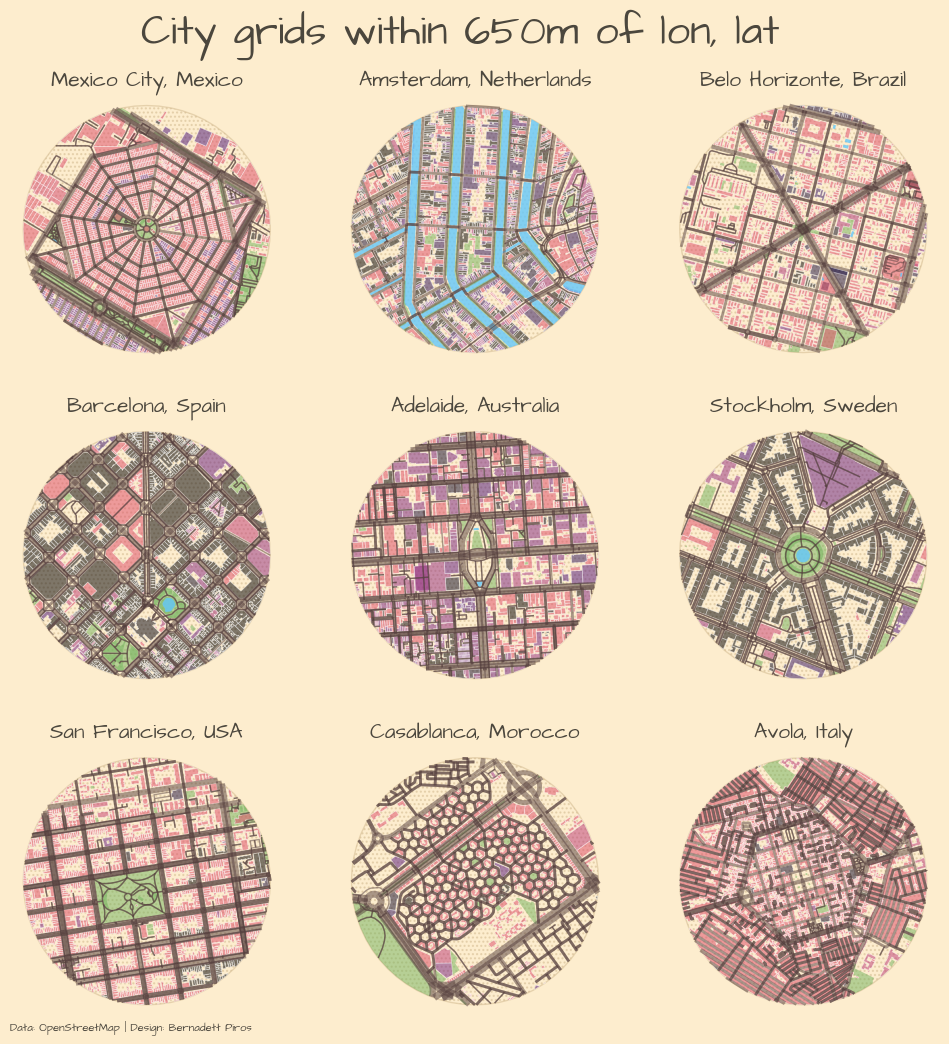

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

txt_style=dict(font=font, size=15, alpha=0.7)

axs = axs.flatten()

radius = 650

for i, (place, lat, lon, water_tag, leisure_tag) in enumerate(zip(places, lats, lons, water_tags, leisure_tags)):
    
     ax = axs[i]         
     ax.set_title(f"{place}", y=1.0, **txt_style) 
    
     point = Point(lon, lat)       
     point_gdf = gpd.GeoSeries([point], crs="EPSG:4326")  
     point_mercator = point_gdf.to_crs(epsg=3857)  
     buffer = point_mercator.buffer(radius)       
     buffer.plot(ax=ax, color="#FDEDCE", alpha=0.5, hatch="....", ec="#D0B78C")
     
     green_spaces = ox.features_from_point((lat, lon), tags=leisure_tag, dist=radius)       
     green_spaces_mercator = green_spaces.to_crs(epsg=3857)
     green_spaces_clipped = gpd.clip(green_spaces_mercator, buffer)
     green_spaces_clipped = green_spaces_clipped[green_spaces_clipped.geom_type != "Point"]
     green_spaces_clipped.plot(ax=ax, color="#71B35D", alpha=0.5)  
    
     G = ox.graph_from_point((lat, lon), dist=radius, network_type="all")    
     edges = ox.graph_to_gdfs(G, nodes=False, edges=True)     
     edges_mercator = edges.to_crs(epsg=3857)
     edges_mercator["linewidth"] = edges_mercator.apply(set_linewidth, axis=1)         
     edges_clipped = gpd.clip(edges_mercator, buffer)  
     edges_clipped = edges_clipped[edges_clipped.geom_type != "Point"]
     edges_clipped.plot(ax=ax, linewidth=edges_clipped["linewidth"], edgecolor="#56403F", alpha=0.5)
    
     osm_buildings = ox.features_from_point((lat, lon), tags={"building": True}, dist=radius)        
     osm_buildings_mercator = osm_buildings.to_crs(epsg=3857)           
     osm_buildings_clipped = gpd.clip(osm_buildings_mercator, buffer)          
     osm_buildings_clipped = osm_buildings_clipped[osm_buildings_clipped.geom_type != "Point"]      
     
     original_cmap = plt.cm.magma
     new_cmap = ListedColormap(original_cmap(np.linspace(0, 0.6, 256)))              
     osm_buildings_clipped.plot(ax=ax, column="building", cmap=new_cmap, alpha=0.5, ec="white", lw=0.5) 

     ax.axis("off")
     
     if i in [7, 8]:
        continue     
     water_bodies = ox.features_from_point((lat, lon), tags=water_tag, dist=radius)  
     water_bodies_mercator = water_bodies.to_crs(epsg=3857)   
     water_bodies_clipped = gpd.clip(water_bodies_mercator, buffer)  
     water_bodies_clipped = water_bodies_clipped[water_bodies_clipped.geom_type != "Point"]   
     water_bodies_clipped.plot(ax=ax, color="#64C8FB", alpha=0.8)       
    
fig.set_facecolor("#FDEDCE") 

fig.text(0.5, 0.95, s=f"City grids within {radius}m of lon, lat", size=30, font=font, alpha=0.7, ha="center", va="top")
    
fig.text(0.125, 0.1, "Data: OpenStreetMap | Design: Bernadett Piros", size=8, font=font, alpha=0.7)

plt.show()

#fig.savefig("city_grids.png", bbox_inches="tight", pad_inches=0.2)  